#Importing Libraries

In [57]:
import numpy 
import pandas as pd
from numpy import arange
from numpy import set_printoptions
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler as mms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#Importing data and naming columns

In [58]:
url = "https://raw.githubusercontent.com/Stellar-K/TDoC-Stonksmaster/Task_4/housing%20(task4).csv"
housing_data= pd.read_csv(url,names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'], delim_whitespace=True)
housing_data= housing_data.dropna()
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#Plotting a correlation heatmap to determine which features should be included in the data that is used to train the ML model.

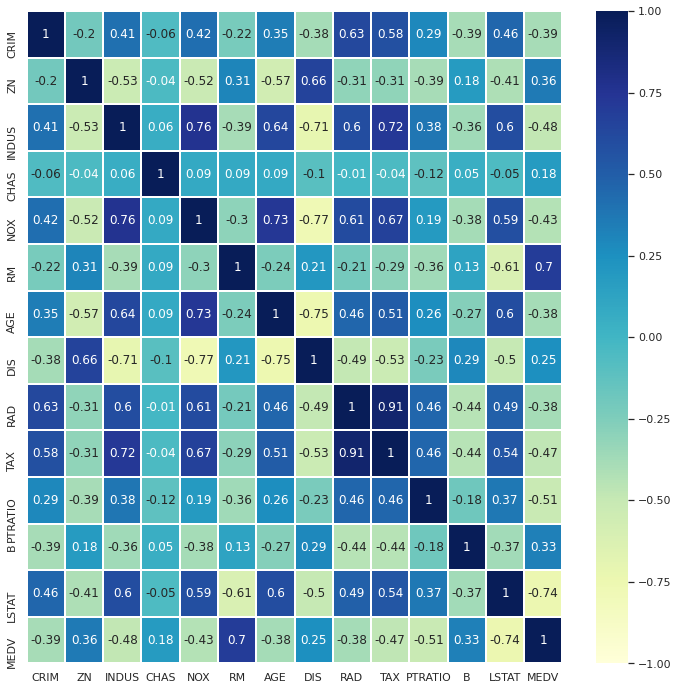

In [59]:
correlation_matrix= housing_data.corr().round(2)
sns.set(rc={'figure.figsize':(12,12)})
figure = sns.heatmap(correlation_matrix, vmin=-1, vmax=1,center=0, annot=True, linewidths=1, cmap='YlGnBu')

Strong correlation is observed between target MEDV and features RM and LSTAT

#Transforming data into arrays which can be scaled

In [60]:
array = housing_data.values
x = array[:, 0:13]
Y = array[:, 13]

#Scaling the data:

In [61]:
scaler = mms()
X = scaler.fit_transform(x)
set_printoptions(precision=4)
print(X[0:1, :])

[[0.     0.18   0.0678 0.     0.3148 0.5775 0.6416 0.2692 0.     0.208
  0.2872 1.     0.0897]]


#Splitting the data

In [62]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=5)


In [63]:
num_folds = 7
seed = 3
scoring = 'r2'

#Creating an array of models

In [64]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append(('Random Forest',RandomForestRegressor()))
models.append(("Gradient Boosting", GradientBoostingRegressor()))
models.append((' Decison Tree ', DecisionTreeRegressor()))
models.append((' Support Vector ', SVR()))

#Evaluating models

In [70]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_result)
    names.append(name)
    print(f'{name} has mean {round(cv_result.mean(), 3)} with standard deviation {round(cv_result.std(), 3)}')

 LR  has mean 0.696 with standard deviation 0.077
 LASSO  has mean 0.211 with standard deviation 0.049
 EN  has mean 0.119 with standard deviation 0.05
 KNN  has mean 0.675 with standard deviation 0.074
Random Forest has mean 0.864 with standard deviation 0.059
Gradient Boosting has mean 0.886 with standard deviation 0.05
 Decison Tree  has mean 0.722 with standard deviation 0.191
 Support Vector  has mean 0.561 with standard deviation 0.114


#Comparing Algorithms

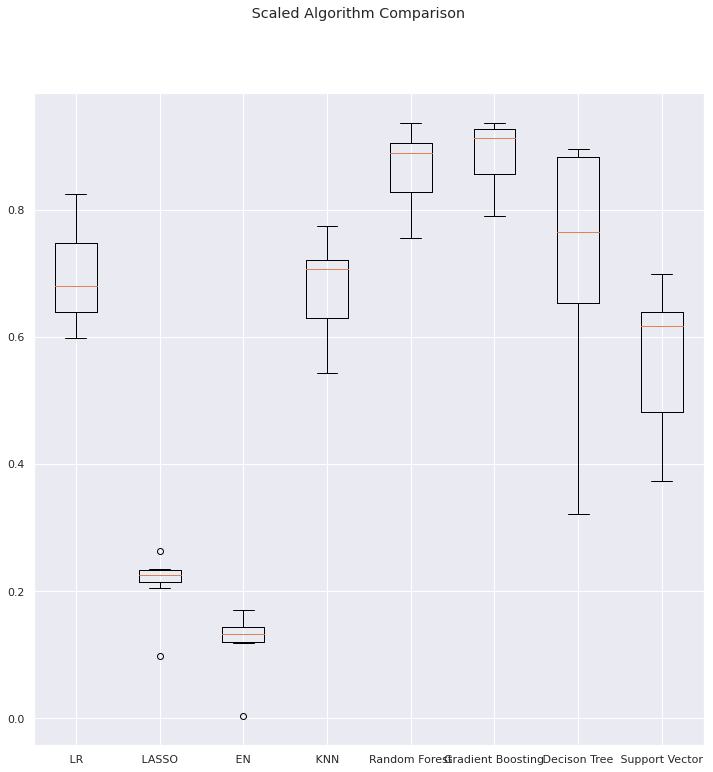

In [71]:
fig = pyplot.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Scaling data to prepare models

In [86]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# Model #1 Gradient Boosting Regressor

In [90]:
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))

0.8783665690065511


# Model #2 Random Forest Regressor

In [91]:
model = RandomForestRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)
predictions = model.predict(rescaledValidationX)
print(r2_score(Y_validation, predictions))

0.8671411688489506


Gradient Boosting Regressor Model gives the maximum accuracy 